In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# load mnist dataset from keras datasets
dataset = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

# normalize dataset
x_train = keras.utils.normalize(x_train)
x_test = keras.utils.normalize(x_test)

# reshaping data
train_shape = x_train.shape
x_train = x_train.reshape(train_shape[0], train_shape[1], train_shape[2], 1)
test_shape = x_test.shape
x_test = x_test.reshape(test_shape[0], test_shape[1], test_shape[2], 1)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [3]:
# creating a sequential model
model = keras.Sequential()

# adding convolutional and pooling layers
model.add(keras.layers.Conv2D(filters = 16, kernel_size = [3, 3], activation = 'relu', strides = 1, padding = 'same'))
model.add(keras.layers.Conv2D(filters = 4, kernel_size = [3, 3], activation = 'relu', strides = 1, padding = 'same'))

model.add(keras.layers.MaxPool2D(strides = 2, padding = 'valid'))  # output ---> dims --> (w + 2p - k_s + 1 / strides)

# flattening data
model.add(keras.layers.Flatten())

# adding 2 hidden layers and the output layer 
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'sigmoid'))

model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics= 'accuracy')

model.fit(x_train, y_train, epochs = 3, batch_size = 1)
loss, accuracy = model.evaluate(x_test, y_test, batch_size = 1)

Epoch 1/3
60000/60000 [==============================] - 217s 4ms/step - loss: 0.1751 - accuracy: 0.9472
Epoch 2/3
60000/60000 [==============================] - 248s 4ms/step - loss: 0.0826 - accuracy: 0.9752
Epoch 3/3
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0717 - accuracy: 0.9780


The number in the image is 5


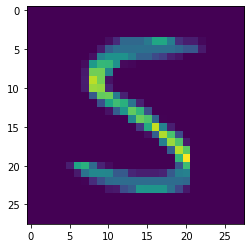

In [4]:
# predicting an image of a given index
img_index = 5456

prediction = np.argmax(model.predict(x_train[img_index].reshape(1, 28, 28)))
print("The number in the image is " + str(prediction))
plt.imshow(x_train[img_index].reshape(28, 28))
